# Quiz 3

```
# Marion Pang (mpangwa1), marion.pang@jhu.edu, gnaprs
```

## Question 1
Load the challenger o-ring data from here https://github.com/bcaffo/ds4bme_intro/blob/master/data/orings.csv
1. Plot whether there was any o-ring failure (total > 0) versus temperature.
2. Fit a logistic regression curve of o-ring failure (outcome) versus temperature.
3. Plot the estimated sigmoid curve from the logistic regression fit on your plot from a.
4. A new oring has a temperature of 74 degrees. What is the estimated probability of failure from your model?


In [0]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import sklearn.linear_model as lm

! if [ ! -e orings.csv ] ; \
  then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/orings.csv; \
fi

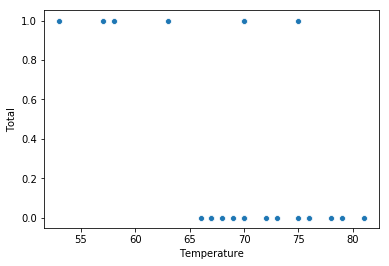

In [0]:
# data manipulation
data1 = pd.read_csv("/content/orings.csv").drop(['Unnamed: 0', 'Erosion', 'Blowby'], axis=1)
data1['Total'][0] = 1

sns.scatterplot(data1["Temperature"], data1["Total"])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15.042901428042326, -0.23216274097407708]
The estimated probability of failure is:  0.10553893819886488


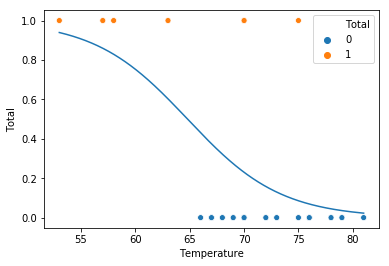

In [0]:
# fit logstical regression
lr = lm.LogisticRegression(fit_intercept=True, solver='lbfgs',penalty='none')
x=np.reshape(data1["Temperature"].values, (-1, 1))
y=np.reshape(data1["Total"].values, (-1,1))
fit = lr.fit(x, y)

# print model parameters
beta0, beta1 = [fit.intercept_[0], fit.coef_[0][0]]
print([beta0, beta1])

# plot sigmoid curve
n = 1000
xplot = np.linspace(min(data1["Temperature"].values), max(data1["Temperature"].values), n)
eta = beta0 + beta1 * xplot
p = 1 / (1 + np.exp(-eta))

sns.scatterplot('Temperature', 'Total', data = data1, hue = 'Total')
sns.lineplot(xplot, p)

p = 1/(1+np.exp(-(beta0+beta1*74)))

print("The estimated probability of failure is: ", p)

## Question 2

Consider a logistic regression model 
$$P(Y_i=1 |  Xi) = \frac{e^{\beta_0(1-X_i)+\beta_1X_i}}{1+e^{\beta_0(1-X_i)+\beta_1X_i}}$$

where $X_i$ is either 0 or 1 depending on subject i’s group. We observe data pairs $(Y_i, X_i)$ where each $Y_i$ is either 0 or 1 and each $X_i$ is either 0 or 1. 
1. Write out the log likelihood that we would maximize to obtain estimates of the parameters.
2. Split the log likelihood into two parts, one where $X_i=0$ and one where $X_i=1$. 
3. Argue that the estimates are
$$\hat{\beta}_0=\log{\left(\frac{\hat{Y}_0}{1-\hat{Y}_0}\right)}$$
$$\hat{\beta}_1=\log{\left(\frac{\hat{Y}_1}{1-\hat{Y}_1}\right)}$$
where $\bar{Y}_0$ is the proportion of 1’s where  $X_i=0$ and $\bar{Y}_1$ is the proportion of 1’s where  $X_i=1$.


### a)
Given that probabilities of independent things multiply, we obtain
$$\begin{equation}P(Y=Y|X)=\prod_{i=1}^{n}\left(\frac{e^{\beta_0(1-X_i)+\beta_1X_i}}{1+e^{\beta_0(1-X_i)+\beta_1X_i}}\right)^{Y_i}\left(\frac{1}{1+e^{\beta_0(1-X_i)+\beta_1X_i}}\right)^{1-Y_i}\end{equation} $$

$$\begin{equation} =\prod_{i=1}^{n}\left(e^{\beta_0(1-X_i)+\beta_1X_i}\right)^{Y_i}\left(1+e^{\beta_0(1-X_i)+\beta_1X_i}\right)^{-1}=* \end{equation}$$
Taking the log, we obtain
$$\begin{equation}\log(*) = \log\sum_{i=1}^{n}{(\beta_0(1-X_i)+\beta_iX_i)y_i}-\sum_{i=1}^{n}\log\left(1+e^{\beta_0(1-X_i)+\beta_1X_i}\right)\end{equation} $$
$$\begin{equation}\boxed{=n\beta_0\bar{Y}+(\beta_1-\beta_0)\sum_{i=1}^{n}(X_iY_i)-\sum_{i=1}^{n}\log\left(1+e^{\beta_0(1-X_i)+\beta_1X_i}\right)} \end{equation}$$
### b)
For $X_i=0$, we obtain
$$\begin{equation}\log(*)=n\beta_0\bar{Y}_0-n\log\left(1+e^{\beta_0}\right)\end{equation}$$
Similarly for $X_i=1$, we obtain
$$\begin{equation}\log(*)=n\beta_0\bar{Y}_1+(\beta_1-\beta_0)n\bar{Y}_1-n\log\left(1+e^{\beta_0}\right)\end{equation}$$
$$\begin{equation}=n\beta_1\bar{Y}_1-n\log\left(1+e^{\beta_1}\right)\end{equation}$$
Therefore, we obtain our final answer
$$\boxed{\begin{equation}
  \gamma=\log(*)=
    \begin{cases}
      X_i=0 & \text{$n\beta_0\bar{Y}_0-n\log\left(1+e^{\beta_0}\right)$}\\
      X_i=1 & \text{$n\beta_1\bar{Y}_1-n\log\left(1+e^{\beta_1}\right)$}
    \end{cases}       
\end{equation}}$$ 

### c) 
To obtain the estimates, we find $\hat{\beta}_i$ that maximizes  $\gamma$. 

Differentiating with respect to $\beta_0$, we obtain
$$\begin{equation}\frac{\delta{\gamma}}{\delta{\beta_0}}=n\bar{Y}_0-\frac{ne^{\beta_0}}{1+e^{\beta_0}}=0\end{equation}$$
$$\begin{equation}\bar{Y}_0=\frac{e^{\beta_0}}{1+e^{\beta_0}}\end{equation}$$
$$\begin{equation}e^{\beta_0}=\frac{\bar{Y}_0}{(1-\bar{Y}_0)}\end{equation}$$
$$\begin{equation}\hat{\beta}_0=\log\left(\frac{\bar{Y}_0}{1-\bar{Y}_0}\right)\end{equation}$$

Similarly, we differentiate with respect to $\beta_1$ to obtain
$$\begin{equation}\frac{\delta{\gamma}}{\delta{\beta_1}}=n\bar{Y}_1-\frac{ne^{\beta_1}}{1+e^{\beta_1}}=0\end{equation}$$
$$\begin{equation}\bar{Y}_1=\frac{e^{\beta_1}}{1+e^{\beta_1}}\end{equation}$$
$$\begin{equation}e^{\beta_1}=\frac{\bar{Y}_1}{(1-\bar{Y}_1)}\end{equation}$$
$$\begin{equation}\hat{\beta}_1=\log\left(\frac{\bar{Y}_1}{1-\bar{Y}_1}\right)\end{equation}$$

Therefore, we obtain
$$\boxed{\begin{equation}
  \beta_i=
    \begin{cases}
      i=0 & \text{$\log\left(\frac{\bar{Y}_0}{1-\bar{Y}_0}\right)$}\\
      i=1 & \text{$\log\left(\frac{\bar{Y}_1}{1-\bar{Y}_1}\right)$}
    \end{cases}       
\end{equation}}$$ 

## Question 3

The project will be to create an colab notebook report of a multivariate regression or logistic regression analysis. Pick out a dataset for analysis and print out the first 10 rows as a dataframe.

In [0]:
# installing kaggle API and uploading API key
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gnaprs","key":"9b380f17a5e41404dd71150be714fd38"}'}

In [0]:
# downloading kaggle dataset
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d svidon/osurankings
! mkdir osurankings
! unzip osurankings.zip -d osurankings


mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/5.00k [00:00<?, ?B/s]
100% 5.00k/5.00k [00:00<00:00, 8.76MB/s]
Archive:  osurankings.zip
  inflating: osurankings/ranking.csv  


In [0]:
# reading in data
projectData = pd.read_csv("osurankings/ranking.csv")
projectData.head(10)

,rank,country_rank,player_name,country,accuracy,play_count,level,hours,performance_points,ranked_score,ss,s,a,watched_by,total_hits,device
0,1,1,Cookiezi,South Korea,98.86,15245,101,324,13450,22401473154,55,454,325,3057421,6372761,tablet
1,2,2,Angelsim,South Korea,98.87,124726,103,1457,12950,35481061465,159,1369,679,498548,29845228,mouse
2,3,1,Rafis,Poland,99.03,208066,103,2229,12942,36343320002,170,1654,785,1170973,35760655,tablet
3,4,1,Vaxei,United States,98.03,93012,101,1034,12735,18096595619,34,541,563,152551,15601281,tablet
4,5,1,hvick225,Taiwan,98.93,134052,102,1970,12421,47072997400,826,3466,701,2015824,22576332,tablet
5,6,1,filsdelama,France,98.59,114629,102,1476,12211,29533435386,196,1516,585,159116,24265869,tablet
6,7,1,_index,Russia,98.74,56195,102,844,11314,38146854078,426,1503,476,463361,18502111,tablet
7,8,1,Dustice,Germany,98.89,83839,101,1246,11208,39126859229,112,2268,1336,75861,19686899,tablet
8,9,1,Spare,United Kingdom,99.25,59329,101,805,11105,33756034097,308,1205,864,135613,11745064,mouse
9,10,2,Gayzmcgee,United States,99.23,78862,101,1058,11054,21973937247,29,658,716,226319,22604434,tablet
